In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

import scienceplots
plt.style.use(['science','no-latex'])

df= pd.read_excel('hall.xlsx')
df

I=df['Current (mA)']
V_h=df['Mean VH (mV)']

V_h=V_h[:19:]
V_h
I=I[:19:]
df


,Current (mA),V_H plus (mV),V_H minus (mV),Mean VH (mV),VH/I (Ω),1900 gauss,15 v 3.5 a,Unnamed: 7
0,0.00,0.0,0.0,0,0.000,NaN,NaN,0.000
1,5.03,4.6,4.5,4.55,0.905,NaN,NaN,0.905
2,5.53,5.0,4.9,4.95,0.895,NaN,NaN,0.895
3,5.98,5.4,5.3,5.35,0.895,NaN,NaN,0.895
4,6.52,6.0,5.9,5.95,0.913,NaN,NaN,0.913
5,7.00,6.4,6.6,6.5,0.929,NaN,NaN,0.929
6,7.49,6.9,6.8,6.85,0.915,NaN,NaN,0.915
7,8.08,7.5,7.4,7.45,0.922,NaN,NaN,0.922
8,8.50,7.9,7.8,7.85,0.924,NaN,NaN,0.924
9,9.05,8.4,8.3,8.35,0.923,NaN,NaN,0.923


In [3]:
def f(x,a):
    return a*x
popt,pcov=curve_fit(f,I,V_h)
popt

array([0.92112486])

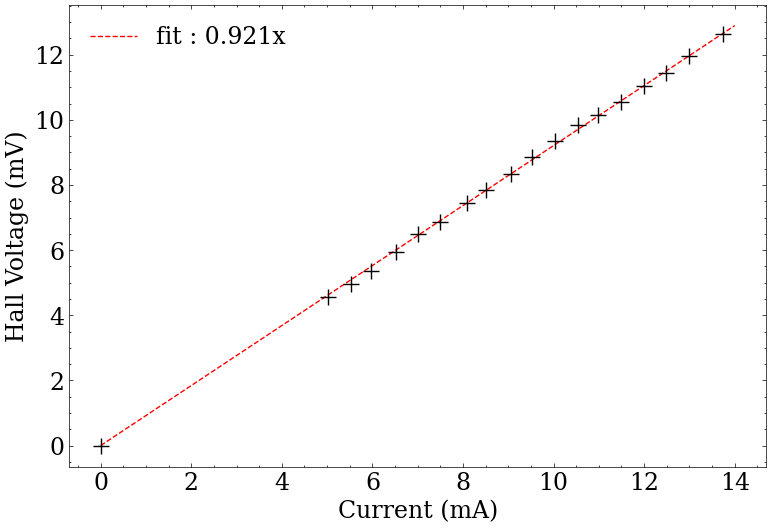

In [16]:
plt.rcParams.update({'font.size': 17})
plt.figure(figsize=(9, 6))
x=np.linspace(0,14,num=100)
plt.plot(x,f(x,*popt),'r--',label=r'fit : 0.921x')
plt.xticks(np.arange(0,16,2))
plt.yticks(np.arange(0,16,2))
plt.plot(I,V_h,'k+',ms=12)
plt.xlabel('Current (mA)')
plt.ylabel('Hall Voltage (mV)')

plt.legend()

In [5]:
np.sqrt(pcov)

array([[0.00185608]])

In [6]:
res = popt[0]
t=5e-4 #m
b=4e-3 #m
l=6e-3 #m
B=1900e-4 #T 


R_h=(res*t)/B

e=1.6e-19 #C

n=(e*R_h)**-1


I_r=np.array([0.51,1,1.53,2.02,2.5])
V_r=np.array([217,425,653,860,1060])
p=(V_r*b*t)/(I_r*l)
u=R_h/np.mean(p)

O=np.arctan(u*B)

Hall  Coefficient

In [7]:
R_h #m3 C-1 

0.0024240127938093435

Density of charge carriers

In [8]:
n #carriers/m3

2.5783692297176807e+21

Resistivity

In [9]:
np.mean(p) #ohm m

0.14180201039711812

Mobility of CHarge carriers

In [10]:
u #m2/Vs

0.01709434716067049

Hall Angle

In [11]:
np.degrees(O)*60 #min

11.165507720929313